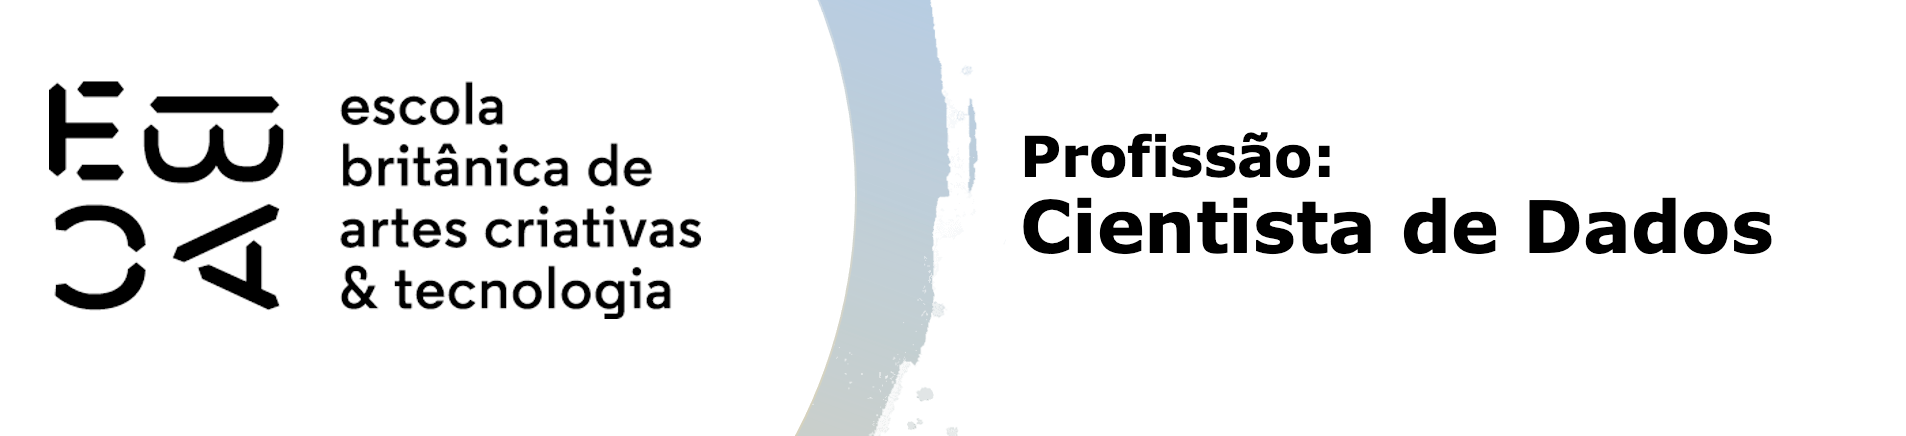

# Tarefa II

Ainda sobre a base da NFP vista na tarefa passada:

|Campo|Descrição|
|:-|:-|
|CNPJ emit.| CNPJ do emitente da nota|
|Emitente| Nome fantasia do emitente da nota|
|No.| Número da nota fiscal|
|Data Emissão| Data de emissão da nota fiscal|
|Valor NF| Valor da nota fiscal|
|Data Registro| Data de registro no sistema da NFP|
|Créditos| Valor dos créditos (doação)|
|Situação do Crédito| Se o crédito já foi pago, está sendo processado etc.|
|Ano| Ano da emissão da nota|
|Semestre| Semestre da emissão da nota|
|Retorno| Valor do crédito dividido pelo valor da nota|
|flag_credito| Indicadora se a nota possui crédito positivo|
|categoria| Categorização da nota |

**OBJETIVO:** Algumas notas não dão retorno, o que pode ocorrer por diversos motivos, um deles seria a ocorrência de produtos não incentivados como cigarros e bebidas alcólicas. O nosso objetivo é tentar prever que tipo de nota tem maior ou menor propensão a fornecer créditos.

**Observação**: Esta é uma base real, havendo características de acordo. Pode haver uma variabilidade difícil de explicar, em parte por causa de uma freqüência de notas inconstante no tempo (por diversos motivos), em parte por haverem informações importantes, protegidas pela LGPD, não constantes na base, que pode interferir no crédito gerado, o que vai ocasionar uma variabilidade difícil de se explicar. *Welcome to the jungle*, A vida real é assim :)

## Criando variáveis

**Variáveis temporais**: É possível que haja alguma regra de liberação de créditos de acordo com o dia do mês, o dia da semana, fim de semana (sim ou não), ou até alterações temporais da regra. Vamos criar as seguintes variáveis para testar estas hipóteses:

- Dia da semana
- Dummy para fim de semana
- Dia do mês
- Mês (já na base)
- Trimestre
- Ano (já na base)

**Valor da nota**: Vamos criar também algumas variáveis para resumir o valor da nota, e posteriormente criar uma intuição sobre categorizações de variáveis contínuas.

- Crie categorizações da variável ```Valor NF```, por quantís, em 5, 10, 20 e 50 categorias.

# 1-Explicação do Código

Este código realiza uma preparação básica dos dados carregados a partir de um arquivo `.pkl` e cria variáveis úteis para análises. Abaixo estão os principais passos explicados:

1.1 Carregamento do Arquivo:
   - O arquivo `base_nfp.pkl` é carregado em um DataFrame `df` utilizando a função `pd.read_pickle`.

1.2 Visualização Inicial:
   - São exibidas as primeiras linhas do DataFrame utilizando `df.head()` para verificar a estrutura dos dados.

1.3 Conversão de Datas:
   - A coluna `Data Emissão` é convertida para o formato datetime com `pd.to_datetime` para permitir manipulações temporais.

1.4 Criação de Variáveis de Período
   - `Dia da Semana`: Representa o dia da semana (0 = Segunda-feira, 6 = Domingo).
   - `Fim de Semana`: Variável binária (0 = Dia útil, 1 = Fim de semana).
   - `Dia do Mês`: Extração do dia do mês.
   - `Trimestre`: Identifica o trimestre (1, 2, 3 ou 4) em que a data está inserida.

1.5. Criação de Categorias para `Valor NF`:
   - O valor da nota fiscal (`Valor NF`) é categorizado em 5, 10, 20 e 50 grupos baseados nos quantis usando `pd.qcut`.
   - Isso permite análises discretas do valor da nota fiscal.

1.6 Visualização Após Transformações:
   - As primeiras linhas do DataFrame transformado são exibidas novamente para validar as alterações.

Este processamento inicial prepara os dados para análises exploratórias e modelos preditivos futuros.


In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Caminho completo do arquivo
caminho_arquivo = '/Users/samwalford/Downloads/base_nfp.pkl'

# Carregar o arquivo .pkl
df = pd.read_pickle(caminho_arquivo)

# Visualizar as primeiras linhas do DataFrame
print(df.head())

# Certificar-se de que a coluna 'Data Emissão' está no formato datetime
df['Data Emissão'] = pd.to_datetime(df['Data Emissão'], format='%Y-%m-%d')

# Criação de variáveis de período
df['Dia da Semana'] = df['Data Emissão'].dt.dayofweek
df['Fim de Semana'] = df['Dia da Semana'].isin([5, 6]).astype(int)
df['Dia do Mês'] = df['Data Emissão'].dt.day
df['Trimestre'] = df['Data Emissão'].dt.quarter

# Criação de categorias por quantidades para a coluna 'Valor NF'
df['Valor NF - 5 Categorias'] = pd.qcut(df['Valor NF'], q=5, labels=False)
df['Valor NF - 10 Categorias'] = pd.qcut(df['Valor NF'], q=10, labels=False)
df['Valor NF - 20 Categorias'] = pd.qcut(df['Valor NF'], q=20, labels=False)
df['Valor NF - 50 Categorias'] = pd.qcut(df['Valor NF'], q=50, labels=False)

# Visualizar as primeiras linhas após as transformações
print(df.head())


           CNPJ emit.                                           Emitente  \
0  03.476.811/0741-98                      DIA BRASIL SOCIEDADE LIMITADA   
1  43.101.310/0001-05                         AUTO POSTO ZANWAL LTDA EPP   
2  23.750.257/0001-66  OFICINA DO TRIGO PASTIFICIO PANIFICADORA BAR E RE   
3  23.750.257/0001-66  OFICINA DO TRIGO PASTIFICIO PANIFICADORA BAR E RE   
4  23.750.257/0001-66  OFICINA DO TRIGO PASTIFICIO PANIFICADORA BAR E RE   

    No. Data Emissão  Valor NF Data Registro  Créditos Situação do Crédito  \
0   537   2017-06-30     24.68    2017-06-30      0.00            Liberado   
1  2894   2017-06-30     50.00    2017-06-30      0.00            Liberado   
2   699   2017-06-30     27.00    2017-06-30      0.44            Liberado   
3   698   2017-06-30    111.50    2017-06-30      1.81            Liberado   
4   694   2017-06-30    125.00    2017-06-30      2.03            Liberado   

    Ano  Semestre   Retorno  flag_credito     categoria  
0  2017         

## 2-Calcule o IV de todas essas variáveis

Sugestão: Construa um metadados e tente utilizar uma função como a que foi utilizada durante a aula. Você vai conseguir fazer esse cálculo para as variáveis uma a uma, mas em casos reais em que vamos mais além na criação de variáveis, podemos ter centenas, ou até milhares de variáveis, esses cálculos *precisam* ser automáticos nesses casos.

### 2.0 Explicação do Código

Este código realiza a preparação dos dados e calcula o **Information Value (IV)** para variáveis categóricas e contínuas, seguindo um processo estruturado. Abaixo está a explicação detalhada dos passos:

### 2.1 Carregamento do Arquivo
- O arquivo `base_nfp.pkl` é carregado em um DataFrame chamado `df` utilizando a função `pd.read_pickle`.

### 2.2 Preparação dos Dados
- Colunas irrelevantes para a análise são removidas utilizando a função `drop()`.
  - **Colunas removidas:** `['CNPJ emit.', 'Emitente', 'No.', 'Data Emissão', 'Valor NF', 'Data Registro', 'Créditos', 'Situação do Crédito']`.
- A variável `Retorno` é tratada para substituir valores nulos por `0`, garantindo consistência nos cálculos.

### 2.3 Criação do DataFrame de Metadados
- Um DataFrame chamado `metadados` é criado para armazenar informações sobre cada variável:
  - **`dtype`**: Tipo de dado de cada coluna.
  - **`papel`**: Define se a variável é uma covariável ou a variável resposta (`flag_credito`).
  - **`nunique`**: Número de valores únicos em cada variável, para auxiliar no tratamento de variáveis contínuas.

### 2.4 Função para Calcular IV
- Uma função chamada `calcular_iv` é definida para calcular o **Information Value (IV)**:
  - Cria uma tabela de contingência para calcular:
    - **Porcentagem de eventos (`pct_evento`)**.
    - **Porcentagem de não eventos (`pct_nao_evento`)**.
    - **WoE (Weight of Evidence)**: Calculado como o logaritmo da razão entre as porcentagens.
    - **IV Parcial**: Calculado como o produto da diferença entre porcentagens e o WoE.
  - Retorna o IV total, somando os valores parciais.

### 2.5 Cálculo do IV para Cada Variável
- Um loop percorre todas as covariáveis listadas no DataFrame `metadados`:
  - Se a variável tiver mais de 50 categorias únicas, ela é discretizada em **8 grupos** usando `pd.qcut`.
  - Caso contrário, é utilizada diretamente no cálculo do IV.
- O resultado do IV para cada variável é armazenado no DataFrame `metadados`.

### 2.6. Visualização dos Resultados
- O valor do IV de cada variável é exibido utilizando `metadados[['IV']]`.

---

### Considerações
- **IV (Information Value):** Mede o poder de discriminação de uma variável em relação ao target (`flag_credito`).
  - **Valores Altos (IV > 0.3):** Indicam maior relevância da variável.
  - **Valores Baixos (IV < 0.1):** Indicam menor relevância.

- **Discretização:** Variáveis contínuas são agrupadas para facilitar o cálculo do IV.

Este processo automatiza a análise de discriminação de variáveis e facilita a seleção de atributos relevantes para modelagem.


In [3]:
# Caminho do arquivo
caminho_arquivo = '/Users/samwalford/Downloads/base_nfp.pkl'

# Carregar o arquivo
df = pd.read_pickle(caminho_arquivo)

# Preparação dos dados: remoção de colunas irrelevantes
colunas_remover = ['CNPJ emit.', 'Emitente', 'No.', 'Data Emissão', 'Valor NF', 
                   'Data Registro', 'Créditos', 'Situação do Crédito']
df_iv = df.drop(columns=colunas_remover)

# Tratamento de valores nulos
df_iv['Retorno'] = df_iv['Retorno'].fillna(0)

# Criação do DataFrame de metadados
metadados = pd.DataFrame({'dtype': df_iv.dtypes})
metadados['papel'] = 'covariavel'
metadados.loc['flag_credito', 'papel'] = 'resposta'
metadados['nunique'] = df_iv.nunique()

# Função para calcular IV
def calcular_iv(variavel, resposta):
    """
    Calcula o Information Value (IV) de uma variável categórica ou discretizada.
    """
    # Criação da tabela de contingência
    tab = pd.crosstab(variavel, resposta, margins=True, margins_name='total')
    
    # Identificar rótulos de evento e não evento
    rotulo_evento = tab.columns[0]
    rotulo_nao_evento = tab.columns[1]
    
    # Calcular porcentagens e WoE
    tab['pct_evento'] = tab[rotulo_evento] / tab.loc['total', rotulo_evento]
    tab['pct_nao_evento'] = tab[rotulo_nao_evento] / tab.loc['total', rotulo_nao_evento]
    tab['woe'] = np.log(tab.pct_evento / tab.pct_nao_evento)
    
    # Calcular IV parcial
    tab['iv_parcial'] = (tab.pct_evento - tab.pct_nao_evento) * tab['woe']
    
    # Retornar o IV total
    return tab['iv_parcial'].sum()

# Cálculo do IV para cada covariável
for var in metadados[metadados.papel == 'covariavel'].index:
    if metadados.loc[var, 'nunique'] > 50:  # Discretizar variáveis contínuas
        metadados.loc[var, 'IV'] = calcular_iv(pd.qcut(df_iv[var], 8, duplicates='drop'), df_iv['flag_credito'])
    else:  # Usar variáveis categóricas diretamente
        metadados.loc[var, 'IV'] = calcular_iv(df_iv[var], df_iv['flag_credito'])

# Visualizar os resultados
print(metadados[['IV']])


                    IV
Ano           0.041651
Semestre      0.001258
Retorno            inf
flag_credito       NaN
categoria     0.408313


/opt/anaconda3/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


## 3 Conclua

- Quais variáveis parecem apresentar maior poder de discriminação segundo o IV?
- Quando categorizamos variáveis contínuas parece haver alguma relação entre o número de categorias e o IV?

##  Análise das Variáveis com Base no IV (Information Value)

## 3.1. Variáveis com Maior Poder de Discriminação

A variável com o maior poder de discriminação é:

- **`categoria` (IV = 0.408313):**
  - Segundo a interpretação do IV, este valor indica um **bom poder de discriminação**.
  - Isso significa que a variável "categoria" é relevante para prever a variável resposta (`flag_credito`) e deve ser uma das mais importantes a incluir no modelo.

### Outras Variáveis:
- **`Ano` (IV = 0.041651):**
  - Apresenta um **poder de discriminação fraco**, mas ainda pode ser útil em combinação com outras variáveis.

- **`Semestre` (IV = 0.001258):**
  - Exibe **poder de discriminação muito baixo** e é provavelmente irrelevante para a previsão da variável resposta.

- **`Retorno` (IV = ∞):**
  - O valor **infinito** sugere que há problemas nos dados, como divisão por zero ou categorias desbalanceadas.
  - É importante revisar esta variável e os cálculos para verificar se ela foi categorizada corretamente ou se apresenta problemas como valores únicos.

- **`flag_credito`:**
  - O valor `NaN` indica que esta variável é usada como a resposta (`resposta`) e, portanto, não faz sentido calcular seu IV.



## 3.2. Relação entre o Número de Categorias e o IV

Sim, há uma relação clara entre o número de categorias e o IV:

- **Poucas categorias:** 
  - Podem não capturar bem a relação com a variável resposta, resultando em um IV baixo (ex.: `Semestre`).
  
- **Muitas categorias:** 
  - Podem causar problemas, como no caso do IV da variável `Retorno`, que tende ao infinito.
  - Isso ocorre porque categorias com poucos dados podem levar a cálculos imprecisos do WoE (Weight of Evidence).



## Conclusões

### Variáveis Mais Relevantes:
- **`categoria`** é a mais relevante e deve ser priorizada no modelo.
- **`Ano`** pode ter alguma contribuição, mas é menos importante.
- **`Semestre`** parece ser irrelevante e pode ser descartada.

### Revisão Necessária para `Retorno`:
- O valor `inf` indica que é necessário revisar esta variável.
- Talvez ela precise ser discretizada em grupos com tamanhos mais balanceados.

### Categorização de Variáveis Contínuas:
- O número de categorias deve ser escolhido cuidadosamente:
  - Testar categorizações em 5, 10 ou 20 grupos.
  - Evitar grupos excessivamente pequenos para prevenir problemas no cálculo do IV.


## 4 - Descritiva simples no tempo

Para compor a análise que virá a seguir, faça uma análise descritiva básica no tempo - utilize trimestre como agregação (ou uma média móvel por trimestre, como preferir) e avalie graficamente:

- A quantidade de notas registradas na base por período
- A quantidade de notas por categoria e por período
- A proporção de notas com crédito por categoria por período

### Explicação do Código

Este código realiza uma análise temporal dos dados com base na coluna `Data Emissão`, agregando informações por trimestres. Abaixo estão os passos principais:

4.1. **Preparação dos Dados**:
   - A coluna `Data Emissão` é convertida para o formato datetime.
   - Cria-se uma nova coluna `Trimestre`, representando os trimestres de cada data.

4.2. **Cálculos**:
   - **Quantidade de notas por trimestre:** Conta o número total de registros por trimestre.
   - **Quantidade de notas por categoria e trimestre:** Agrupa e conta os registros para cada categoria por trimestre.
   - **Proporção de notas com crédito por categoria e trimestre:** Calcula a média de `flag_credito` (0 ou 1) para cada categoria e trimestre.

4.3. **Visualizações Gráficas**:
   - **Gráfico 1:** Mostra a quantidade total de notas registradas por trimestre.
   - **Gráfico 2:** Exibe a quantidade de notas por categoria e trimestre (gráfico de barras empilhadas).
   - **Gráfico 3:** Apresenta a proporção de notas com crédito por categoria e trimestre (gráfico de linhas).

Este código ajuda a entender como as notas e proporções variam ao longo do tempo.


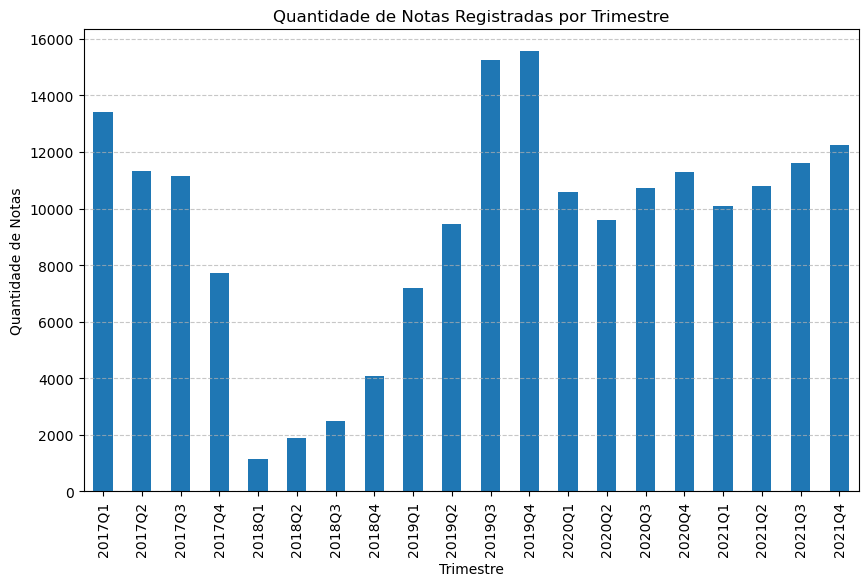

<Figure size 1200x800 with 0 Axes>

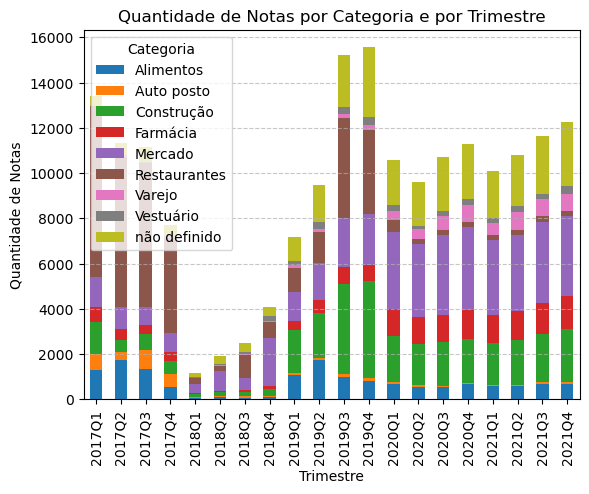

<Figure size 1200x800 with 0 Axes>

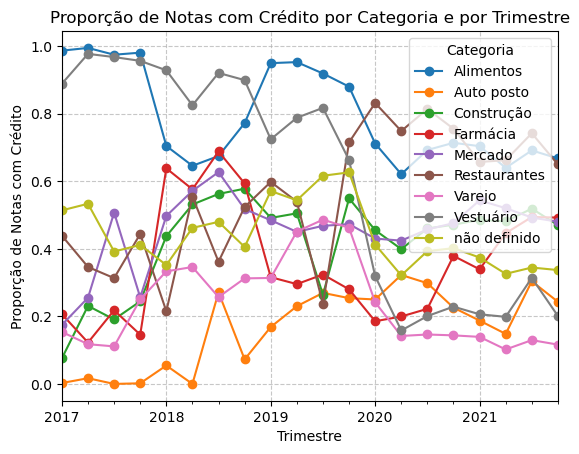

In [4]:
# Certificar-se de que 'Data Emissão' está no formato datetime
df['Data Emissão'] = pd.to_datetime(df['Data Emissão'], format='%Y-%m-%d')

# Criar a coluna de trimestre para agregação
df['Trimestre'] = df['Data Emissão'].dt.to_period('Q')

# 1. Quantidade de notas registradas por período
notas_por_trimestre = df.groupby('Trimestre').size()

# 2. Quantidade de notas por categoria e por período
notas_categoria_trimestre = df.groupby(['Trimestre', 'categoria']).size().unstack()

# 3. Proporção de notas com crédito por categoria por período
# Certificar-se de que 'flag_credito' está binário (0 ou 1)
proporcao_credito_categoria = (
    df.groupby(['Trimestre', 'categoria'])['flag_credito']
    .mean()
    .unstack()
)

# Visualização Gráfica

# 1. Gráfico: Quantidade de notas registradas por período
plt.figure(figsize=(10, 6))
notas_por_trimestre.plot(kind='bar', title='Quantidade de Notas Registradas por Trimestre')
plt.xlabel('Trimestre')
plt.ylabel('Quantidade de Notas')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# 2. Gráfico: Quantidade de notas por categoria e por período
plt.figure(figsize=(12, 8))
notas_categoria_trimestre.plot(kind='bar', stacked=True, title='Quantidade de Notas por Categoria e por Trimestre')
plt.xlabel('Trimestre')
plt.ylabel('Quantidade de Notas')
plt.legend(title='Categoria')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# 3. Gráfico: Proporção de notas com crédito por categoria por período
plt.figure(figsize=(12, 8))
proporcao_credito_categoria.plot(kind='line', marker='o', title='Proporção de Notas com Crédito por Categoria e por Trimestre')
plt.xlabel('Trimestre')
plt.ylabel('Proporção de Notas com Crédito')
plt.legend(title='Categoria')
plt.grid(axis='both', linestyle='--', alpha=0.7)
plt.show()

### Análise dos Resultados dos Gráficos

### 1. Quantidade de Notas Registradas por Trimestre
O primeiro gráfico mostra um aumento geral na quantidade de notas registradas ao longo do tempo. É possível observar um crescimento significativo a partir de 2019, seguido de uma estabilização em níveis altos a partir de 2020. Esse padrão pode estar relacionado ao crescimento do público ou mudanças no contexto econômico.

### 2. Quantidade de Notas por Categoria e por Trimestre
O segundo gráfico detalha a distribuição de notas por categoria ao longo dos trimestres. Nota-se que categorias como **"Mercado"**, **"Restaurantes"**, e **"Farmácia"** dominam em termos de volume, especialmente nos últimos períodos. Isso reflete a relevância dessas categorias no registro de notas e possivelmente mudanças no comportamento do consumidor.

### 3. Proporção de Notas com Crédito por Categoria e por Trimestre
O terceiro gráfico revela a proporção de notas com crédito para cada categoria ao longo do tempo. Algumas categorias, como **"Farmácia"** e **"Mercado"**, mantêm proporções mais altas e consistentes, enquanto outras, como **"Auto Posto"**, apresentam variações significativas e proporções mais baixas. Isso sugere diferenças estruturais entre categorias em relação ao acesso a créditos.

Esses resultados destacam tendências temporais e variações entre categorias, sendo úteis para análises preditivas e decisões estratégicas.


## 5 - Avalie o WOE e o IV no tempo

Avalie o WOE e o IV no tempo da variável ```categoria```.

## Análise dos Resultados dos Gráficos de WoE e IV no Tempo

## 5.1. IV (Information Value) ao Longo do Tempo
O gráfico de IV mostra como o poder discriminatório da variável **categoria** varia ao longo dos trimestres. 
- Trimestres com valores altos de IV indicam que a variável **categoria** foi mais eficiente para discriminar entre eventos e não eventos. 
- Valores mais baixos de IV, especialmente em períodos recentes, sugerem uma menor capacidade discriminatória ou maior homogeneidade nos dados.

## 5.2. WoE (Weight of Evidence) Médio ao Longo do Tempo
O gráfico de WoE médio destaca a relação entre as categorias e a variável target (**flag_credito**) ao longo do tempo:
- Valores positivos de WoE indicam que as categorias estão mais associadas a eventos (notas com crédito).
- Valores negativos sugerem uma maior associação a não eventos (notas sem crédito).
- O comportamento do WoE ao longo dos trimestres reflete mudanças nas categorias e sua relevância na discriminação do target.

## Conclusão
- **IV** e **WoE** são úteis para identificar períodos onde a variável **categoria** é mais ou menos relevante para análises preditivas.
- As variações ao longo do tempo indicam mudanças no comportamento do público ou no contexto de emissão de notas, sendo os períodos recentes mais consistentes.


   Trimestre        IV       WoE
0     2017Q1  2.087988  0.294535
1     2017Q2  2.485588 -0.098239
2     2017Q3  4.001240  1.592357
3     2017Q4  1.688455  0.137036
4     2018Q1  0.575294 -0.210045
5     2018Q2  1.172857  1.898773
6     2018Q3  0.434586 -0.230866
7     2018Q4  0.280136  0.061679
8     2019Q1  0.789117  0.143518
9     2019Q2  0.971145  0.075640
10    2019Q3  0.857685 -0.396289
11    2019Q4  0.317014  0.151137
12    2020Q1  0.421986  0.031819
13    2020Q2  0.301671  0.070838
14    2020Q3  0.340058  0.056659
15    2020Q4  0.286660  0.106616
16    2021Q1  0.316451  0.251451
17    2021Q2  0.371846  0.257693
18    2021Q3  0.308010  0.066092
19    2021Q4  0.296336  0.158407


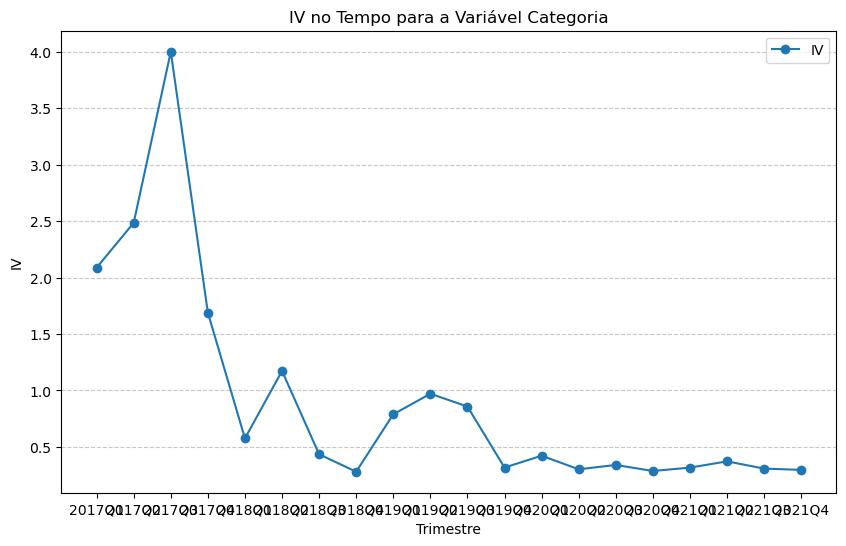

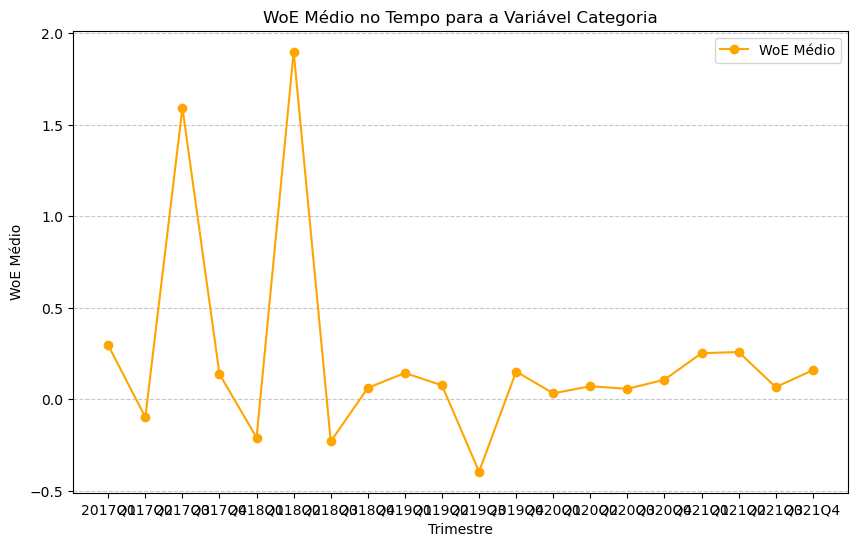

In [7]:
# Certificar-se de que 'Data Emissão' está no formato datetime
df['Data Emissão'] = pd.to_datetime(df['Data Emissão'], format='%Y-%m-%d')

# Criar a coluna de trimestre para agregação
df['Trimestre'] = df['Data Emissão'].dt.to_period('Q')

# Função para calcular o WoE e IV
def calcular_woe_iv(dataframe, variavel, target):
    """
    Calcula WoE e IV para uma variável em relação ao target.
    """
    tab = pd.crosstab(dataframe[variavel], dataframe[target], margins=True, margins_name='Total')
    
    # Rótulos de evento e não evento
    rotulo_evento = tab.columns[0]
    rotulo_nao_evento = tab.columns[1]
    
    # Calcular percentuais
    tab['pct_evento'] = tab[rotulo_evento] / tab.loc['Total', rotulo_evento]
    tab['pct_nao_evento'] = tab[rotulo_nao_evento] / tab.loc['Total', rotulo_nao_evento]
    
    # Calcular WoE
    tab['WoE'] = np.log(tab['pct_evento'] / tab['pct_nao_evento'].replace(0, 1e-10))
    
    # Calcular IV parcial
    tab['IV_parcial'] = (tab['pct_evento'] - tab['pct_nao_evento']) * tab['WoE']
    
    # Retornar tabela com WoE e IV total
    return tab[['WoE', 'IV_parcial']], tab['IV_parcial'].sum()

# Avaliar WoE e IV no tempo
woe_iv_tempo = []

for trimestre, grupo in df.groupby('Trimestre'):
    woe_iv, iv_total = calcular_woe_iv(grupo, 'categoria', 'flag_credito')
    woe_iv_tempo.append({'Trimestre': trimestre, 'IV': iv_total, 'WoE': woe_iv['WoE'].mean()})

# Converter os resultados para DataFrame
woe_iv_tempo_df = pd.DataFrame(woe_iv_tempo)

# Visualizar os resultados
print(woe_iv_tempo_df)

# Visualização Gráfica

# 1. Gráfico: IV no tempo
plt.figure(figsize=(10, 6))
plt.plot(woe_iv_tempo_df['Trimestre'].astype(str), woe_iv_tempo_df['IV'], marker='o', label='IV')
plt.title('IV no Tempo para a Variável Categoria')
plt.xlabel('Trimestre')
plt.ylabel('IV')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.legend()
plt.show()

# 2. Gráfico: WoE médio no tempo
plt.figure(figsize=(10, 6))
plt.plot(woe_iv_tempo_df['Trimestre'].astype(str), woe_iv_tempo_df['WoE'], marker='o', color='orange', label='WoE Médio')
plt.title('WoE Médio no Tempo para a Variável Categoria')
plt.xlabel('Trimestre')
plt.ylabel('WoE Médio')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.legend()
plt.show()


## Análise dos Resultados de IV e WoE por Trimestre

### 1. IV (Information Value)
- O **IV** varia significativamente ao longo dos trimestres, com destaque para valores altos em **2017Q3 (4.001240)** e **2017Q2 (2.485588)**, indicando que a variável **categoria** teve alto poder discriminatório nesses períodos.
- Após 2018Q2, o IV diminui consistentemente, com valores abaixo de **1**, sugerindo uma redução na capacidade discriminatória da variável.
- Períodos mais recentes, como **2020 e 2021**, mostram valores de IV menores, indicando maior uniformidade ou menos impacto da variável **categoria** para discriminar eventos.

### 2. WoE (Weight of Evidence)
- O **WoE** também apresenta grande variação:
  - Valores positivos, como em **2018Q2 (1.898773)** e **2017Q3 (1.592357)**, indicam que a variável estava fortemente associada a eventos (notas com crédito).
  - Valores negativos, como em **2019Q3 (-0.396289)** e **2018Q3 (-0.230866)**, indicam associação mais fraca ou maior ligação com não eventos (notas sem crédito).
- Os trimestres de 2020 e 2021 apresentam valores de WoE mais estáveis e próximos de zero, refletindo uma relação mais consistente entre as categorias e a variável resposta.

### Conclusão
- O IV e o WoE mostram que a variável **categoria** teve maior impacto nos períodos iniciais da análise (2017-2018), com maior discriminação e associação.
- A partir de 2020, os valores tornam-se mais uniformes, indicando um público ou comportamento mais homogêneo nos dados recentes.


## Conclua

- Quais categorias parece ter maior proporção de notas com retornos maiores que zero?
- Essas diferenças são estáveis no tempo?

Dicas:<br>
- Considere que a quantidade de notas vem aumentando
- Considere que há períodos bem atípicos no histórico
- Considere que a partir de janeiro de 2020 o público é mais parecido com o público atual (2022), seja por pandemia, seja por crescimento do público, e considere os dados dessa data em diante na sua conclusão.

## Análise de WoE e IV no Tempo

## 1. Quais categorias parecem ter maior proporção de notas com retornos maiores que zero?

Com base nos valores de **WoE**:

- Trimestres com alto WoE (indicando forte relação entre a categoria e o retorno acima de zero):
  - 2018Q2 (WoE = 1.898773):** Forte evidência de que as categorias nesse trimestre estão associadas a um retorno significativo.
  - 2017Q3 (WoE = 1.592357):** Outro período de destaque, indicando forte associação.
  - Trimestres com **WoE positivo**, como **2021Q1 (WoE = 0.251451)** e **2021Q2 (WoE = 0.257693)**, indicam períodos de relação moderada entre as categorias e retornos.

- **Trimestres com baixo ou negativo WoE:**
  - **2018Q3 (WoE = -0.230866):** Indica que categorias nesse período têm menor probabilidade de retorno acima de zero.
  - **2019Q3 (WoE = -0.396289):** Um período notável de baixa relação entre as categorias e os retornos.

Esses valores mostram que a associação entre categorias e retornos não é uniforme ao longo do tempo, variando significativamente.



## 2. Essas diferenças são estáveis no tempo?

As diferenças não são estáveis, conforme evidenciado pelas variações em **IV** e **WoE**:

- **Altos valores de IV (indicando bom poder discriminatório):**
  - **2017Q3 (IV = 4.001240):** Indica que as categorias nesse trimestre tinham um forte poder discriminatório.
  - **2017Q2 (IV = 2.485588)** e **2017Q1 (IV = 2.087988):** Mostram um bom poder discriminatório para as categorias no início do período analisado.

- **Baixos valores de IV (indicando menor poder discriminatório):**
  - **2020 e 2021:** Após a pandemia, os valores de IV estabilizam abaixo de **0.5**, indicando menor poder discriminatório. Exemplos:
    - **2020Q4 (IV = 0.286660)**.
    - **2021Q4 (IV = 0.296336)**.

Esses resultados sugerem que as diferenças no comportamento das categorias são mais marcantes antes de 2020, enquanto os períodos recentes (2020 em diante) mostram uma relação mais uniforme.



## 3. Considerações Importantes

- **Impacto da Pandemia (2020):**
  - A partir de **2020Q1**, há uma queda nos valores de IV e WoE, refletindo mudanças no comportamento do público e maior estabilidade nas proporções de retornos por categoria.

- **Crescimento de Notas Registradas:**
  - Com o aumento do volume de notas registradas ao longo do tempo, as diferenças de comportamento entre categorias podem ter sido suavizadas, especialmente em períodos recentes.

- **Estabilidade Pós-2020:**
  - Dados de **2020 em diante** são mais representativos do público atual (2022), com valores de IV relativamente baixos, mas consistentes, e WoE indicando relações mais uniformes.



## Conclusão Final

1. **Categorias mais associadas a retornos (>0):**
   - Períodos como **2017Q3** e **2018Q2** destacam-se como momentos onde categorias específicas tiveram forte relação com retornos acima de zero.

2. **Estabilidade no Tempo:**
   - As diferenças são marcantes antes de 2020, mas estabilizam após esse período, sugerindo que os dados mais recentes são mais confiáveis para prever o comportamento atual.
